In [134]:
import pandas as pd

In [135]:
matches=pd.read_csv("games.csv", index_col=0)

In [136]:
matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,13/08/2022,21:00,La Liga,Matchweek 1,Sat,Home,D,0,0,Rayo Vallecano,...,Match Report,NaN,21,5,17.0,1,0,0,2022,Barcelona
1,21/08/2022,22:00,La Liga,Matchweek 2,Sun,Away,W,4,1,Real Sociedad,...,Match Report,NaN,15,7,14.6,0,0,0,2022,Barcelona
2,28/08/2022,19:30,La Liga,Matchweek 3,Sun,Home,W,4,0,Valladolid,...,Match Report,NaN,24,9,14.4,1,0,0,2022,Barcelona
3,03/09/2022,21:00,La Liga,Matchweek 4,Sat,Away,W,3,0,Sevilla,...,Match Report,NaN,18,5,16.0,2,0,0,2022,Barcelona
5,10/09/2022,18:30,La Liga,Matchweek 5,Sat,Away,W,4,0,Cádiz,...,Match Report,NaN,16,8,14.9,0,0,0,2022,Barcelona


In [137]:
matches.shape


(1304, 27)

In [138]:
matches["Team"].value_counts()

Barcelona          70
Osasuna            70
Valencia           70
Valladolid         70
Cadiz              70
Real Madrid        70
Sevilla            70
Celta Vigo         70
Athletic Club      70
Real Betis         70
Villarreal         70
Real Sociedad      70
Atletico Madrid    70
Granada            38
Levante            38
Getafe             38
Alaves             38
Elche              38
Huesca             38
Eibar              38
Girona             32
Rayo Vallecano     32
Mallorca           32
Almeria            32
Name: Team, dtype: int64

In [139]:
matches["Round"].value_counts()

Matchweek 1     37
Matchweek 19    37
Matchweek 32    37
Matchweek 31    37
Matchweek 30    37
Matchweek 29    37
Matchweek 28    37
Matchweek 27    37
Matchweek 26    37
Matchweek 25    37
Matchweek 24    37
Matchweek 23    37
Matchweek 22    37
Matchweek 21    37
Matchweek 2     37
Matchweek 17    37
Matchweek 20    37
Matchweek 18    37
Matchweek 9     37
Matchweek 3     37
Matchweek 4     37
Matchweek 5     37
Matchweek 6     37
Matchweek 16    37
Matchweek 8     37
Matchweek 7     37
Matchweek 10    37
Matchweek 11    37
Matchweek 12    37
Matchweek 13    37
Matchweek 14    37
Matchweek 15    37
Matchweek 33    20
Matchweek 34    20
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: Round, dtype: int64

# Looks like we have don't full season




In [140]:
matches.dtypes

Date             object
Time             object
Comp             object
Round            object
Day              object
Venue            object
Result           object
GF                int64
GA                int64
Opponent         object
xG              float64
xGA             float64
Poss              int64
Attendance      float64
Captain          object
Formation        object
Referee          object
Match Report     object
Notes           float64
Sh                int64
SoT               int64
Dist            float64
FK                int64
PK                int64
PKatt             int64
Season            int64
Team             object
dtype: object

In [141]:
matches["Date"]= pd.to_datetime(matches["Date"])

C:\Users\preet\AppData\Local\Temp\ipykernel_30300\3518475557.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  matches["Date"]= pd.to_datetime(matches["Date"])


In [142]:
matches.dtypes

Date            datetime64[ns]
Time                    object
Comp                    object
Round                   object
Day                     object
Venue                   object
Result                  object
GF                       int64
GA                       int64
Opponent                object
xG                     float64
xGA                    float64
Poss                     int64
Attendance             float64
Captain                 object
Formation               object
Referee                 object
Match Report            object
Notes                  float64
Sh                       int64
SoT                      int64
Dist                   float64
FK                       int64
PK                       int64
PKatt                    int64
Season                   int64
Team                    object
dtype: object

# predictors for model
Venue- home and away advantage is signiificant in football. so i am going to convert home and away into numbers

Team- give each team a code

Time- do some teams play better at certain times of the day? Night games and mid afternoon games can have different outcomes because of several factors like heat, rain, visibility, crowd energy amanog many others

Day- same as above. Sunday games have more viewers as opposed to midweek. Could such pressure affect performance

In [143]:
matches["Venue_value"]=matches["Venue"].astype("category").cat.codes

In [144]:
matches["Opponent_value"]=matches["Opponent"].astype("category").cat.codes

In [145]:
matches["Hour"]=matches["Time"].str.replace(":.+","", regex=True).astype("int")

In [146]:
matches["Day_Value"]=matches["Date"].dt.dayofweek

In [147]:
matches["Target"]= (matches["Result"]=="W").astype("int")


In [148]:
matches

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,FK,PK,PKatt,Season,Team,Venue_value,Opponent_value,Hour,Day_Value,Target
0,2022-08-13,21:00,La Liga,Matchweek 1,Sat,Home,D,0,0,Rayo Vallecano,...,1,0,0,2022,Barcelona,1,18,21,5,0
1,2022-08-21,22:00,La Liga,Matchweek 2,Sun,Away,W,4,1,Real Sociedad,...,0,0,0,2022,Barcelona,0,20,22,6,1
2,2022-08-28,19:30,La Liga,Matchweek 3,Sun,Home,W,4,0,Valladolid,...,1,0,0,2022,Barcelona,1,23,19,6,1
3,2022-03-09,21:00,La Liga,Matchweek 4,Sat,Away,W,3,0,Sevilla,...,2,0,0,2022,Barcelona,0,21,21,2,1
5,2022-10-09,18:30,La Liga,Matchweek 5,Sat,Away,W,4,0,Cádiz,...,0,0,0,2022,Barcelona,0,7,18,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,2021-01-05,14:00,La Liga,Matchweek 34,Sat,Home,W,3,0,Alavés,...,0,0,0,2022,Eibar,1,0,14,1,1
37,2021-09-05,14:00,La Liga,Matchweek 35,Sun,Away,W,1,0,Getafe,...,0,1,1,2022,Eibar,0,11,14,6,1
38,2021-05-13,20:00,La Liga,Matchweek 36,Thu,Home,D,1,1,Betis,...,0,0,0,2022,Eibar,1,5,20,3,0
39,2021-05-16,18:30,La Liga,Matchweek 37,Sun,Away,L,1,4,Valencia,...,0,0,0,2022,Eibar,0,22,18,6,0


In [149]:
from sklearn.ensemble import RandomForestClassifier

# Model choice
Random forest helps pick up non linear trends in data. there i s no clear relantionship between hour and winning. this model will help us determine such trends.

Trained on data from previous seasons.
Tetsed on current season.

In [150]:
rf=RandomForestClassifier(min_samples_split=10,n_estimators=50,random_state=1)

In [151]:
train=matches[matches["Date"]<"2022-01-01"]

In [152]:
test=matches[matches["Date"]>"2022-01-01"]

In [153]:
predictors=["Venue_value","Opponent_value","Day_Value","Hour"]

In [154]:
rf.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [155]:
pred= rf.predict(test[predictors])

In [156]:
from sklearn.metrics import accuracy_score

determine what percentage of times was the model accuracte

In [157]:
accuracy=accuracy_score(test["Target"],pred)
accuracy

0.6084558823529411

In [158]:
combined=pd.DataFrame(dict(actual=test["Target"], predictions=pred))

In [159]:
pd.crosstab(index=combined["actual"], columns=combined["predictions"])

predictions,0,1
actual,,
0,261,54
1,159,70


we predicted a loss/draw correctly 122 times, and a win 51 times

In [160]:
from sklearn.metrics import precision_score

In [161]:
precision_score(test["Target"],pred)

0.5645161290322581

we can improve predictions


In [162]:
matches_pool=matches.groupby("Team")

In [163]:
group=matches_pool.get_group("Barcelona")

# Improving predictors 
Form- current form is important in determining the outcome of next game. so we can leverage this further imporve our model. in this case past 4 games are being used to detemine form

Goals For-
Goals Against-
Pentaly kick attempts-
Distance a shot is taken from-
Free kicks-
Shots on target-
Penalty kicks-
Shots-
Expectaged goals- 
Expected goals against-

 

In [164]:
def averages(group,cols, new_cols):
    group=group.sort_values("Date")
    stats=group[cols].rolling(4, closed="left").mean()
    group[new_cols]=stats
    group=group.dropna(subset=new_cols)
    return group

In [183]:
cols=["GF","GA","PKatt","Dist","FK","SoT","PK","Sh"]

In [185]:
new_cols=[f"{i}_avg" for i in cols]

In [186]:
new_cols

['GF_avg',
 'GA_avg',
 'PKatt_avg',
 'Dist_avg',
 'FK_avg',
 'SoT_avg',
 'PK_avg',
 'Sh_avg']

In [187]:
averages(group,cols,new_cols)

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Day_Value,Target,GF_avg,GA_avg,PKatt_avg,Dist_avg,FK_avg,SoT_avg,PK_avg,Sh_avg
0,2020-09-27,21:00,La Liga,Matchweek 3,Sun,Home,W,4,0,Villarreal,...,6,1,2.50,1.25,0.50,18.475,1.50,6.00,0.25,14.00
3,2020-10-17,21:00,La Liga,Matchweek 6,Sat,Away,L,0,1,Getafe,...,5,0,2.75,1.25,0.75,18.050,1.50,7.00,0.50,16.25
5,2020-10-24,16:00,La Liga,Matchweek 7,Sat,Home,L,1,3,Real Madrid,...,5,0,2.50,1.25,0.75,17.300,1.50,6.00,0.50,15.00
7,2020-10-31,21:00,La Liga,Matchweek 8,Sat,Away,D,1,1,Alavés,...,5,0,2.50,1.50,0.75,16.475,0.75,5.00,0.50,12.25
10,2020-11-21,21:00,La Liga,Matchweek 10,Sat,Away,L,0,1,Atlético Madrid,...,5,0,1.50,1.25,0.25,17.100,1.50,5.25,0.25,14.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2023-05-03,16:15,La Liga,Matchweek 24,Sun,Home,W,1,0,Valencia,...,2,1,2.25,0.50,0.00,17.000,0.75,5.50,0.00,13.50
22,2023-08-01,21:00,La Liga,Matchweek 16,Sun,Away,W,1,0,Atlético Madrid,...,1,1,2.25,0.50,0.25,17.775,1.25,5.50,0.00,13.25
42,2023-10-04,21:00,La Liga,Matchweek 28,Mon,Home,D,0,0,Girona,...,2,0,2.25,0.00,0.25,17.500,1.25,4.75,0.00,13.25
31,2023-12-02,21:00,La Liga,Matchweek 21,Sun,Away,W,1,0,Villarreal,...,5,1,1.25,0.00,0.25,16.950,0.75,4.00,0.00,14.00


In [188]:
all_form= matches.groupby("Team").apply(lambda i : averages(i,cols,new_cols))

In [189]:
all_form=all_form.droplevel("Team")

now we have rolling avg fro all teams

In [190]:
all_form.index=range(all_form.shape[0])
all_form

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Day_Value,Target,GF_avg,GA_avg,PKatt_avg,Dist_avg,FK_avg,SoT_avg,PK_avg,Sh_avg
0,2020-09-20,18:30,La Liga,Matchweek 2,Sun,Away,L,1,2,Granada,...,6,0,0.50,0.50,0.00,14.650,0.00,2.00,0.00,6.50
1,2020-09-26,13:00,La Liga,Matchweek 3,Sat,Home,D,0,0,Getafe,...,5,0,0.50,1.00,0.00,15.125,0.25,2.00,0.00,5.75
2,2020-09-30,19:00,La Liga,Matchweek 4,Wed,Away,L,1,3,Villarreal,...,2,0,0.50,1.00,0.00,15.550,0.50,1.75,0.00,6.75
3,2020-10-18,18:30,La Liga,Matchweek 6,Sun,Home,L,0,2,Elche,...,6,0,0.50,1.50,0.00,15.875,0.50,2.00,0.00,7.25
4,2020-10-25,14:00,La Liga,Matchweek 7,Sun,Away,W,2,0,Valladolid,...,6,1,0.50,1.75,0.00,18.075,0.50,2.00,0.00,8.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,2023-04-30,16:15,La Liga,Matchweek 32,Sun,Home,W,3,1,Celta Vigo,...,6,1,2.00,1.50,0.25,15.750,0.50,7.50,0.00,21.50
1200,2023-07-01,16:15,La Liga,Matchweek 16,Sat,Home,W,2,1,Real Madrid,...,5,1,2.25,1.75,0.50,16.725,0.50,6.75,0.00,19.25
1201,2023-08-04,21:00,La Liga,Matchweek 28,Sat,Away,W,3,2,Real Madrid,...,4,1,2.50,1.50,0.75,17.400,0.25,6.00,0.25,17.75
1202,2023-12-02,21:00,La Liga,Matchweek 21,Sun,Home,L,0,1,Barcelona,...,5,0,3.00,1.50,0.75,18.225,0.50,6.75,0.25,17.75


In [191]:
def make_preds(data,preds):
    train=data[data["Date"]<"2023-01-01"]
    
    test=data[data["Date"]>"2023-01-01"]
    
    rf.fit(train[preds], train["Target"])
    
    pred= rf.predict(test[preds])

    combined=pd.DataFrame(dict(actual=test["Target"], predictions=pred), index= test.index)
    
    precision=precision_score(test["Target"],pred)
    
    return combined,precision

In [192]:
combined,precision=make_preds(all_form,predictors+new_cols)

In [193]:
precision


0.5633802816901409

improved preditions

In [175]:
combined=combined.merge(all_form[["Team","Opponent","Result","Date"]], left_index=True, right_index=True)

In [176]:
combined

,actual,predictions,Team,Opponent,Result,Date
45,0,0,Almeria,Atlético Madrid,D,2023-01-15
46,0,0,Almeria,Valencia,D,2023-01-23
47,1,0,Almeria,Espanyol,W,2023-01-27
48,0,1,Almeria,Celta Vigo,D,2023-02-04
49,0,0,Almeria,Girona,L,2023-02-17
...,...,...,...,...,...,...
1199,1,1,Villarreal,Celta Vigo,W,2023-04-30
1200,1,1,Villarreal,Real Madrid,W,2023-07-01
1201,1,1,Villarreal,Real Madrid,W,2023-08-04
1202,0,1,Villarreal,Barcelona,L,2023-12-02


In [177]:
home_away= combined.merge(combined, left_on=["Date","Team"], right_on=["Date", "Opponent"])

In [178]:
home_away

,actual_x,predictions_x,Team_x,Opponent_x,Result_x,Date,actual_y,predictions_y,Team_y,Opponent_y,Result_y
0,0,1,Athletic Club,Mallorca,D,2023-01-05,0,0,Mallorca,Athletic Club,D
1,0,0,Athletic Club,Real Sociedad,L,2023-01-14,1,0,Real Sociedad,Athletic Club,W
2,0,0,Athletic Club,Real Madrid,L,2023-01-22,1,1,Real Madrid,Athletic Club,W
3,0,0,Athletic Club,Celta Vigo,L,2023-01-29,1,0,Celta Vigo,Athletic Club,W
4,0,0,Athletic Club,Atlético Madrid,L,2023-02-19,1,1,Atletico Madrid,Athletic Club,W
...,...,...,...,...,...,...,...,...,...,...,...
181,1,1,Villarreal,Celta Vigo,W,2023-04-30,0,0,Celta Vigo,Villarreal,L
182,1,1,Villarreal,Real Madrid,W,2023-07-01,0,0,Real Madrid,Villarreal,L
183,1,1,Villarreal,Real Madrid,W,2023-08-04,0,0,Real Madrid,Villarreal,L
184,0,1,Villarreal,Barcelona,L,2023-12-02,1,1,Barcelona,Villarreal,W


In [179]:
home_away[(home_away["predictions_x"]==1)& (home_away["predictions_y"]==0)]["actual_x"].value_counts()

0    17
1    17
Name: actual_x, dtype: int64

# Variable importance plot 
lets do a variable importance plot to determine what factors the random forest model thought were important

Below our graph shows what features are important in making a prediction:, in this case it is shot_average.
Importantly, the opponent_value is also important. this means our model has realsised some teams are better than others. e.g barcelona or madrid.


In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [181]:
def importance(importance,names):
    
    its_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'Names':feature_names,'its_importance':its_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['its_importance'], ascending=False,inplace=True)
    
    plt.figure(figsize=(5,5))
    sns.barplot(x=fi_df['its_importance'], y=fi_df['Names'],color="Black")
    
    plt.title('RANDOM FOREST ' + 'IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

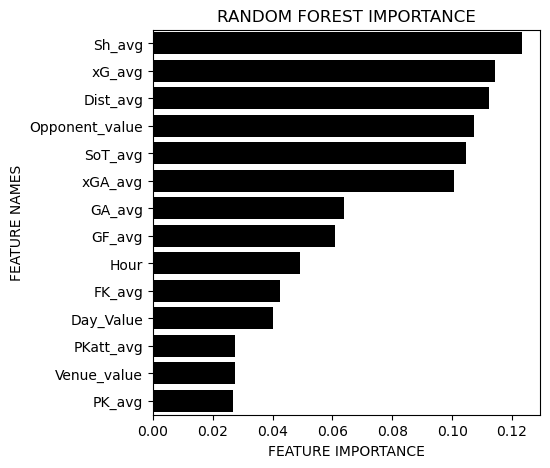

In [182]:
importance(rf.feature_importances_,predictors+new_cols)
